In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [31]:
# Column names of the CSV file
column_names = ['sex', 'percentile', 'age', 'BMI']

# 	skiprows=1: This skips the first row of the CSV file when reading it.
raw_dataset = pd.read_csv("IMC_Varones_y_mujeres.csv", names=column_names, sep=',',skiprows=1)

In [32]:
# Convert the dataset to a Pandas DataFrame
dataset = raw_dataset.copy()
# dataset.tail()

# Convert the dataset to a Pandas DataFrame
df  =   raw_dataset.copy()

#filtered_df = df[(df['sex'] == 'M') & (df['Percentil'] == 97)]

# Filter the DataFrame based on the condition: Edad < 5.5
filtered_df = df[(df['age'] < 5.5)]

filtered_df

,sex,percentile,age,BMI
0,M,97,5.118310,16.465448
15,M,85,5.118310,15.385226
30,M,75,5.124883,14.956315
45,M,25,5.118310,13.574266
60,M,10,5.105165,13.050041
75,M,3,5.124883,12.541698
90,F,97,5.125235,18.614898
105,F,85,5.125235,16.958847
120,F,75,5.118644,16.321905
136,F,50,5.184558,15.270949


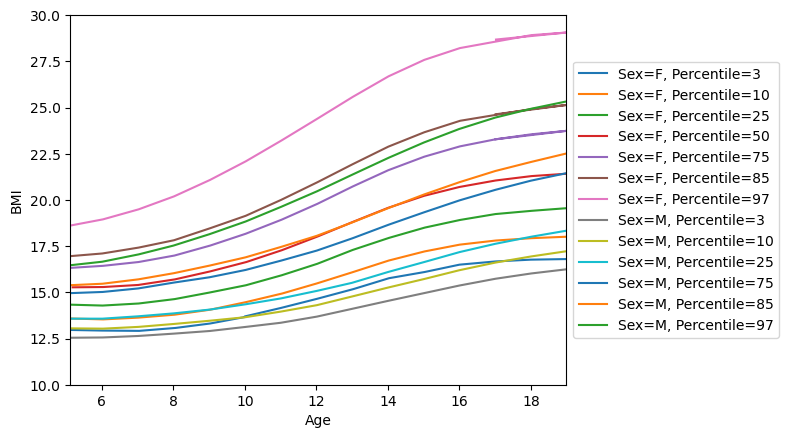

In [33]:
# The loop iterates through each gender and percentile group in groups, extracts the age (Edad) and BMI (IMC), 
# and plots the relationship for each group on the same set of axes (ax). Each group’s plot will be labeled 
# with its corresponding gender and percentile, making it easier to differentiate between the different curves 
# in the final plot.

# Select unique values of Edad and store them in x_range
# .unique() returns an array of the unique values present in the 'Edad' column, eliminating any duplicates.  
x_range = df['age'].unique()

# Group the data by Sexo and Percentil (group contains the actual data (subset of the DataFrame) for this 
# specific combination of sexo and percentil)
groups = df.groupby(['sex', 'percentile'])

# Create a figure and axes
fig, ax = plt.subplots()

#  Loop through the groups collection (each item is a tuple that contains two parts: sexo (gender) and percentil (percentile)
#  as well as the group.
for i, ((sex, percentile), group) in enumerate(groups):
    # Extract the x and y values
    x = group['age']
    y = group['BMI']
    
    # Plot the data on the axes, offset vertically by i
    ax.plot(x, y, label=f"Sex={sex}, Percentile={percentile}")

# Set the x-axis limits and labels
ax.set_xlim(x_range[0], x_range[-1])
ax.set_xlabel("Age")

# Set the y-axis limits and label
ax.set_ylim(10, 30)

# Automatically set the y-axis limits based on the data range
# ax.autoscale(enable=True, axis='y')
ax.set_ylabel("BMI")

# Add a legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plot
plt.show()

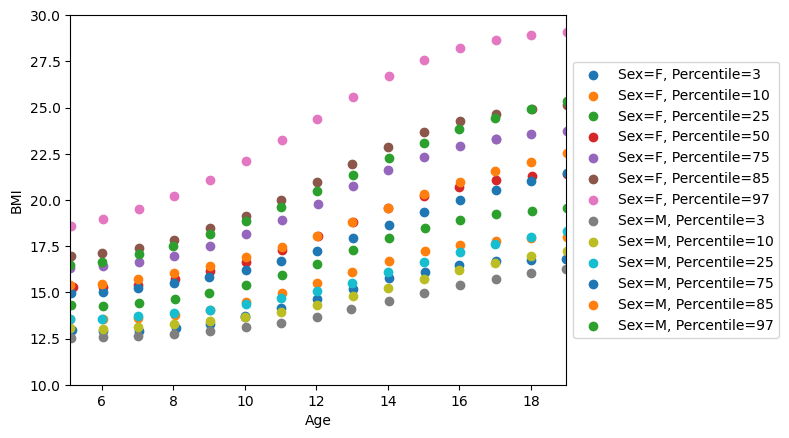

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the necessary data

# Select unique values of Edad and store them in x_range
x_range = df['age'].unique()

# Group the data by Sexo and Percentil
groups = df.groupby(['sex', 'percentile'])

# Create a figure and axes
fig, ax = plt.subplots()

# Loop through the groups collection
for i, ((sex, percentile), group) in enumerate(groups):
    # Extract the x and y values
    x = group['age']
    y = group['BMI']
    
    # Plot the data as scattered points on the axes
    ax.scatter(x, y, label=f"Sex={sex}, Percentile={percentile}")

# Set the x-axis limits and labels
ax.set_xlim(x_range[0], x_range[-1])
ax.set_xlabel("Age")

# Set the y-axis limits and label
ax.set_ylim(10, 30)

# Set the y-axis label
ax.set_ylabel("BMI")

# Add a legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plot
plt.show()

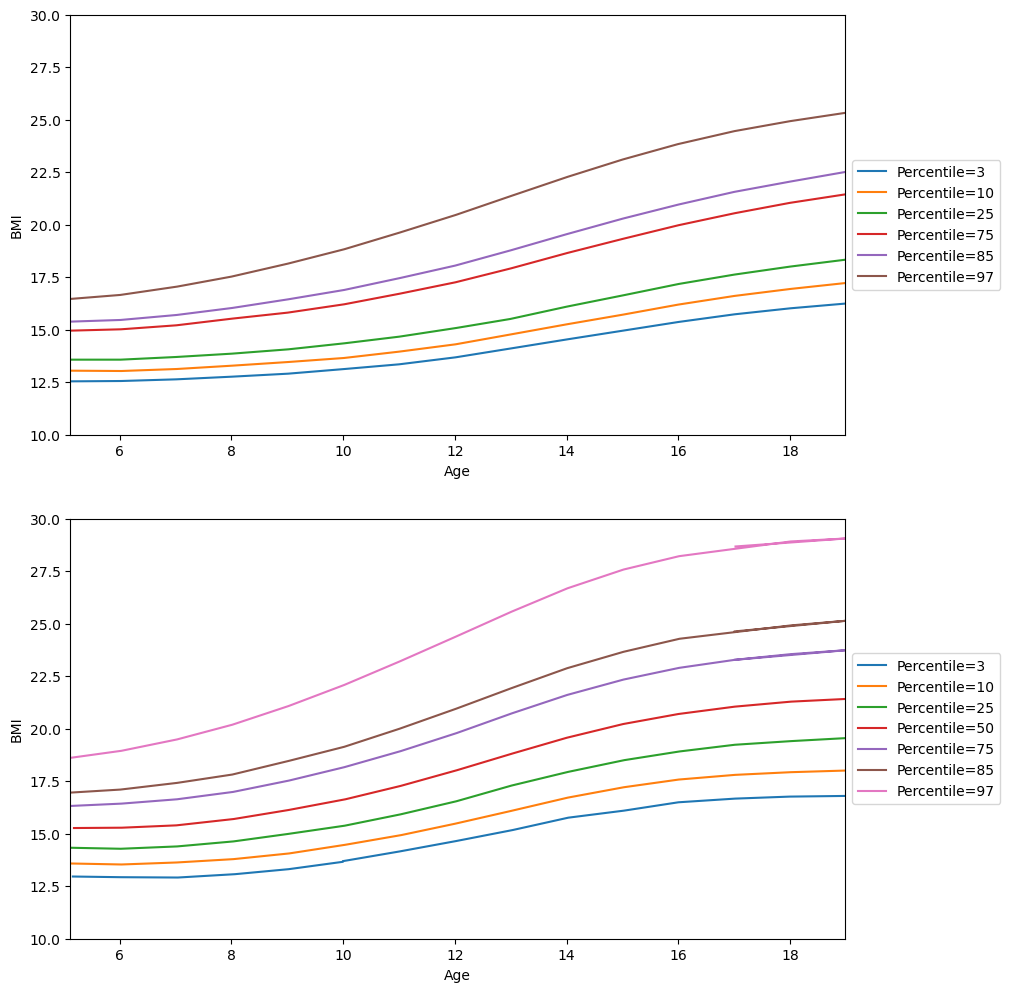

In [35]:
# This cell groups the DataFrame by gender and BMI percentile, then creates separate plots for males and females on 
# two vertically stacked axes. Each axis has its own age vs. BMI data plotted, with corresponding legends for BMI percentiles.

# Define the x range based on unique age values in the dataset
x_range = df['age'].unique()

# Group the data by 'Sexo' (gender) and 'Percentil' (BMI percentile)
groups = df.groupby(['sex', 'percentile'])

# Create two sets of axes, one for each gender (Male and Female), with a figure size of 10x12
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Iterate over each group (combination of Sexo and Percentil) and plot the data on the respective axis
for i, ((sex, percentile), group) in enumerate(groups):
    # Extract the x and y values
    x = group['age']
    y = group['BMI']
    
    # If the group corresponds to 'M' (Male), plot on the first axis (ax1)
    if sex == 'M':
        ax1.plot(x, y, label=f"Percentile={percentile}")
     # If the group corresponds to 'F' (Female), plot on the second axis (ax2)
    else:
        ax2.plot(x, y, label=f"Percentile={percentile}")

# Set the x-axis limits based on the first and last unique age values
ax1.set_xlim(x_range[0], x_range[-1])
ax2.set_xlim(x_range[0], x_range[-1])

# Set the x-axis labels ("Age") for both plots
ax1.set_xlabel("Age")
ax2.set_xlabel("Age")

# Set the y-axis limits (BMI values) to range from 10 to 30 for both plots
ax1.set_ylim(10, 30)
ax2.set_ylim(10, 30)

# Label the y-axis as "IMC" (BMI) for both plots
ax1.set_ylabel("BMI")
ax2.set_ylabel("BMI")

# Add a legend to each plot, positioning it to the right of the plots
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plots
plt.show()


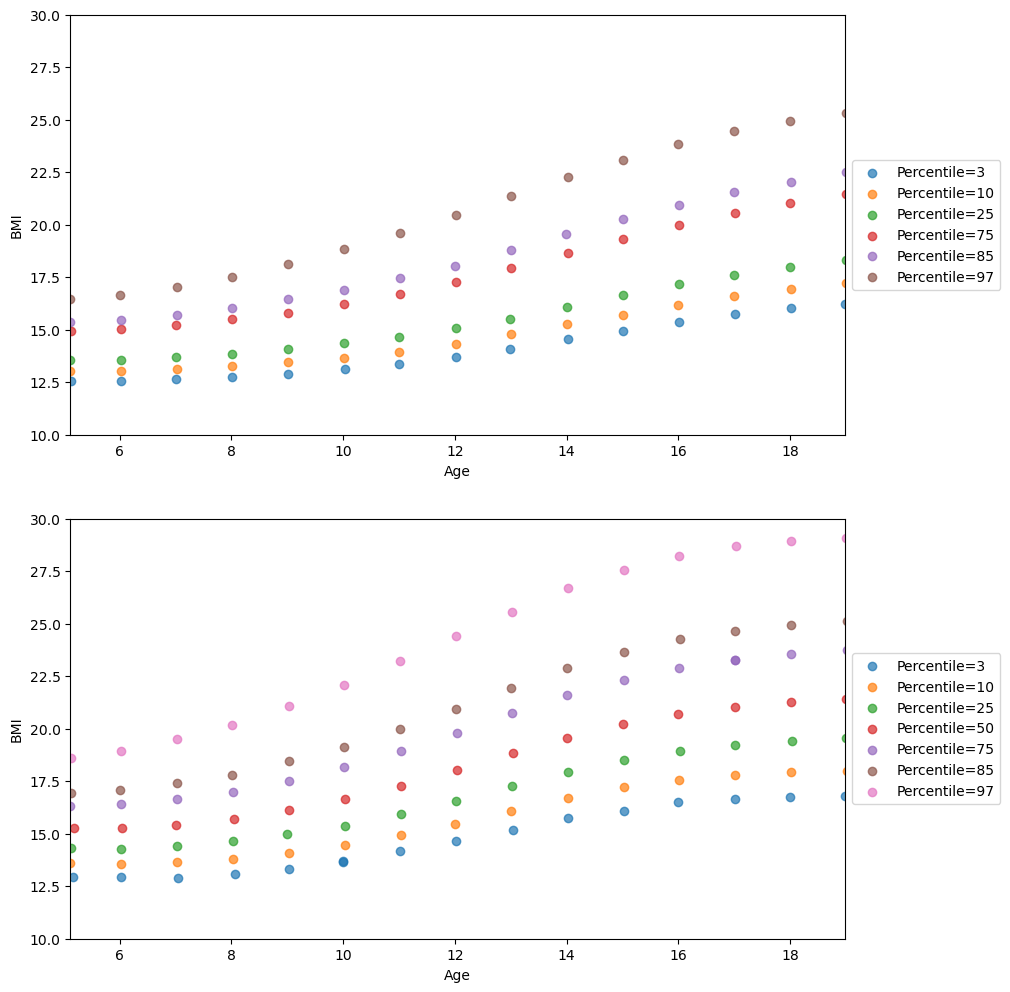

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the necessary data

# Define the x range based on unique age values in the dataset
x_range = df['age'].unique()

# Group the data by 'Sexo' (gender) and 'Percentil' (BMI percentile)
groups = df.groupby(['sex', 'percentile'])

# Create two sets of axes, one for each gender (Male and Female), with a figure size of 10x12
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Iterate over each group (combination of Sexo and Percentil) and plot the data on the respective axis
for i, ((sex, percentile), group) in enumerate(groups):
    # Extract the x and y values
    x = group['age']
    y = group['BMI']
    
    # If the group corresponds to 'M' (Male), plot on the first axis (ax1)
    if sex == 'M':
        ax1.scatter(x, y, label=f"Percentile={percentile}", alpha=0.7)  # Scatter plot for males
    # If the group corresponds to 'F' (Female), plot on the second axis (ax2)
    else:
        ax2.scatter(x, y, label=f"Percentile={percentile}", alpha=0.7)  # Scatter plot for females

# Set the x-axis limits based on the first and last unique age values
ax1.set_xlim(x_range[0], x_range[-1])
ax2.set_xlim(x_range[0], x_range[-1])

# Set the x-axis labels ("Age") for both plots
ax1.set_xlabel("Age")
ax2.set_xlabel("Age")

# Set the y-axis limits (BMI values) to range from 10 to 30 for both plots
ax1.set_ylim(10, 30)
ax2.set_ylim(10, 30)

# Label the y-axis as "IMC" (BMI) for both plots
ax1.set_ylabel("BMI")
ax2.set_ylabel("BMI")

# Add a legend to each plot, positioning it to the right of the plots
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show the plots
plt.show()

In [37]:
# 	train_dataset: This line selects 80% of the original dataset randomly, ensuring that the same random selection 
#  can be reproduced by setting a seed with random_state =0.
#	•	test_dataset: This line creates the test dataset by removing the rows that are included in train_dataset 
#  from the original dataset, ensuring that the training and testing datasets do not overlap.

# Randomly sample 80% of the dataset to create the training dataset
train_dataset = dataset.sample(frac=0.99, random_state=0)

# Take the original dataset and remove the rows that correspond to the indices of the training dataset.
test_dataset = dataset.drop(train_dataset.index)

In [38]:
# Create a copy of the training dataset to work with
train_features = train_dataset.copy()  

# Create a copy of the test dataset to work with
test_features = test_dataset.copy()     

# Extract the target variable 'Percentil' from the training features
# and convert it to a float32 type, removing it from the train_features DataFrame
train_labels = train_features.pop('percentile').astype("float32")  

# Extract the target variable 'Percentil' from the test features
# and convert it to a float32 type, removing it from the test_features DataFrame
test_labels = test_features.pop('percentile').astype("float32")  

# Print the type of train_labels to verify it is a Series of float32
print(type(train_labels))  

# Print the type of test_labels to verify it is a Series of float32
print(type(test_labels))  

# Display the last few entries of the test_labels Series
test_labels.tail()  

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


47     25.0
172    10.0
Name: percentile, dtype: float32

In [39]:
# Initialize a Normalization layer from TensorFlow Keras
# This layer will normalize the input data using the last column as the reference
# The 'axis=-1' argument specifies that normalization will be applied to the last dimension
# This is useful for multi-dimensional data where we want to normalize each sample independently
normalizer = tf.keras.layers.Normalization(axis=-1)  

In [40]:
# Convert the 'sex' column into dummy/indicator variables for training features
# 'pd.get_dummies' creates binary columns for each category in 'sex', with one column for each unique value
# The 'prefix' and 'prefix_sep' parameters are set to empty strings to avoid adding prefixes to the new columns
# The 'dtype=int' argument specifies that the resulting dummy columns should be of integer type
# Finally, convert the entire DataFrame to float32 type for consistency in data types

# Set the order of categories for the 'sex' column in train_features
train_features['sex'] = train_features['sex'].astype(pd.CategoricalDtype(categories=['F', 'M'], ordered=True))

# Convert the 'sex' column into dummy/indicator variables for training features
train_features = pd.get_dummies(train_features, columns=['sex'], prefix='', prefix_sep='', dtype=int).astype("float32")

# Set the order of categories for the 'sex' column in test_features
test_features['sex'] = test_features['sex'].astype(pd.CategoricalDtype(categories=['F', 'M'], ordered=True))

# Repeat the same process for test features
test_features = pd.get_dummies(test_features, columns=['sex'], prefix='', prefix_sep='', dtype=int).astype("float32")

# Adapt the normalizer to the training features
normalizer.adapt(np.array(train_features))

# Display the last few rows of the training features DataFrame
train_features.tail()

,age,BMI,F,M
9,14.017839,22.279587,0.0,1.0
103,19.006592,29.060759,1.0,0.0
67,12.013145,14.305004,0.0,1.0
192,15.025424,16.098726,1.0,0.0
117,18.017891,24.920631,1.0,0.0


In [41]:
# Print the computed mean of the features from the normalizer
# The mean is calculated based on the training dataset and is used for normalization
print(normalizer.mean.numpy())

[[12.07  17.857  0.544  0.456]]


In [42]:
# Extract the first example from the training features as a NumPy array
first = np.array(train_features[:1])

# Set options for printing NumPy arrays to control precision and suppress scientific notation
with np.printoptions(precision=2, suppress=True):
    # Print the first example from the training features
    print('First example:', first)
    print("------------")
    
    # Normalize the first example using the normalizer and print the normalized values
    # Convert to NumPy for better readability
    print('Normalized:', normalizer(first).numpy())

First example: [[10.02 19.14  1.    0.  ]]
------------
Normalized: [[-0.48  0.34  0.92 -0.92]]


In [43]:
# Create a linear model using Keras Sequential API
linear_model = tf.keras.Sequential([
    # Add the normalizer layer that normalizes the input data
    normalizer,
    
    # Add a Dense layer with 32 units and ReLU activation function
    layers.Dense(32, activation='relu'),
    
    # Add another Dense layer with 32 units and ReLU activation function
    layers.Dense(32, activation='relu'),
    
    # Add a third Dense layer with 32 units and ReLU activation function
    layers.Dense(32, activation='relu'),
    
    # Add the output layer with a single unit (for regression tasks)
    layers.Dense(units=1)
])

In [44]:
# Use the linear_model to predict outputs for the first 10 samples in the training features
predictions = linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 28ms/step


In [45]:
# Access the weights (kernel) of the second layer in the linear_model
weights = linear_model.layers[1].kernel

In [46]:
# Compile the linear_model with an optimizer and a loss function
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
    loss='mean_absolute_error'  # Loss function is Mean Absolute Error
)

# Display the last few entries of the train_labels DataFrame/Series
train_labels.tail()

9      97.0
103    97.0
67     10.0
192     3.0
117    85.0
Name: percentile, dtype: float32

In [47]:
# Measure the execution time for the model training
#%%time

# Fit the linear_model on the training data
history = linear_model.fit(
    train_features,              # Features used for training
    train_labels,                # Labels corresponding to the features
    epochs=150,                  # Number of times the model will see the entire training dataset
    verbose=0,                   # Suppress logging of training progress
    validation_split=0.2         # Use 20% of the training data for validation
)

# Display the train_features DataFrame
train_features

,age,BMI,F,M
110,10.022599,19.140375,1.0,0.0
12,17.001877,24.455917,0.0,1.0
178,17.016008,17.802795,1.0,0.0
74,19.006573,17.227959,0.0,1.0
149,18.017891,21.290058,1.0,0.0
...,...,...,...,...
9,14.017839,22.279587,0.0,1.0
103,19.006592,29.060759,1.0,0.0
67,12.013145,14.305004,0.0,1.0
192,15.025424,16.098726,1.0,0.0


In [48]:
train_labels

110    85.0
12     97.0
178    10.0
74     10.0
149    50.0
       ... 
9      97.0
103    97.0
67     10.0
192     3.0
117    85.0
Name: percentile, Length: 195, dtype: float32

In [49]:
# This function is intended to visualize the training and validation loss over the epochs after training a model. 
# You would typically call this function after fitting a model to assess its performance and check for signs of 
# overfitting or underfitting based on the loss curves.
def plot_loss(history):
    # Plot the training loss from the history object
    plt.plot(history.history['loss'], label='loss')
    
    # Plot the validation loss from the history object
    plt.plot(history.history['val_loss'], label='val_loss')
    
    # Set the limits for the y-axis to improve visualization
    plt.ylim([0, 70])
    
    # Label the x-axis to indicate that it represents epochs
    plt.xlabel('Epoch')
    
    # Label the y-axis to indicate that it represents error in Percentile
    plt.ylabel('Error [Percentile]')
    
    # Add a legend to the plot to differentiate between loss and validation loss
    plt.legend()
    
    # Add a grid to the plot for better readability
    plt.grid(True)

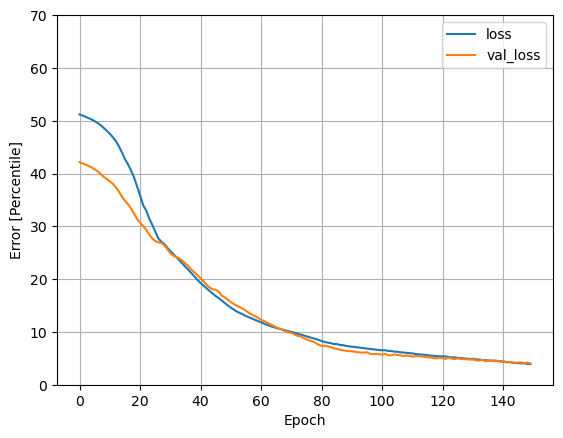

In [50]:
plot_loss(history)

In [51]:
# Initialize a dictionary to hold test results (commented out as it's not used)
# test_results = {}

# Evaluate the trained linear model on the test dataset
test_results = linear_model.evaluate(
    test_features,  # Features of the test dataset
    test_labels,    # True labels corresponding to the test features
    verbose=1       # Set to 1 to display detailed evaluation output
)

# Output the evaluation results, which typically include the loss value
test_results  # This variable will hold the evaluation metrics, such as loss

1/1 [==============================] - 0s 9ms/step - loss: 2.0134


2.0134029388427734

In [52]:
# Use the trained linear model to make predictions on the test features
predictions = linear_model.predict(test_features)

# Output the predictions for review
predictions  # This will contain the predicted values for the test dataset based on the input features

1/1 [==============================] - 0s 28ms/step


array([[28.02 ],
       [ 8.994]], dtype=float32)

In [53]:
# Display the test_features DataFrame to see the features used for predictions
print(test_features)

           age        BMI    F    M
47    7.011268  13.701350  0.0  1.0
172  11.044257  14.936554  1.0  0.0


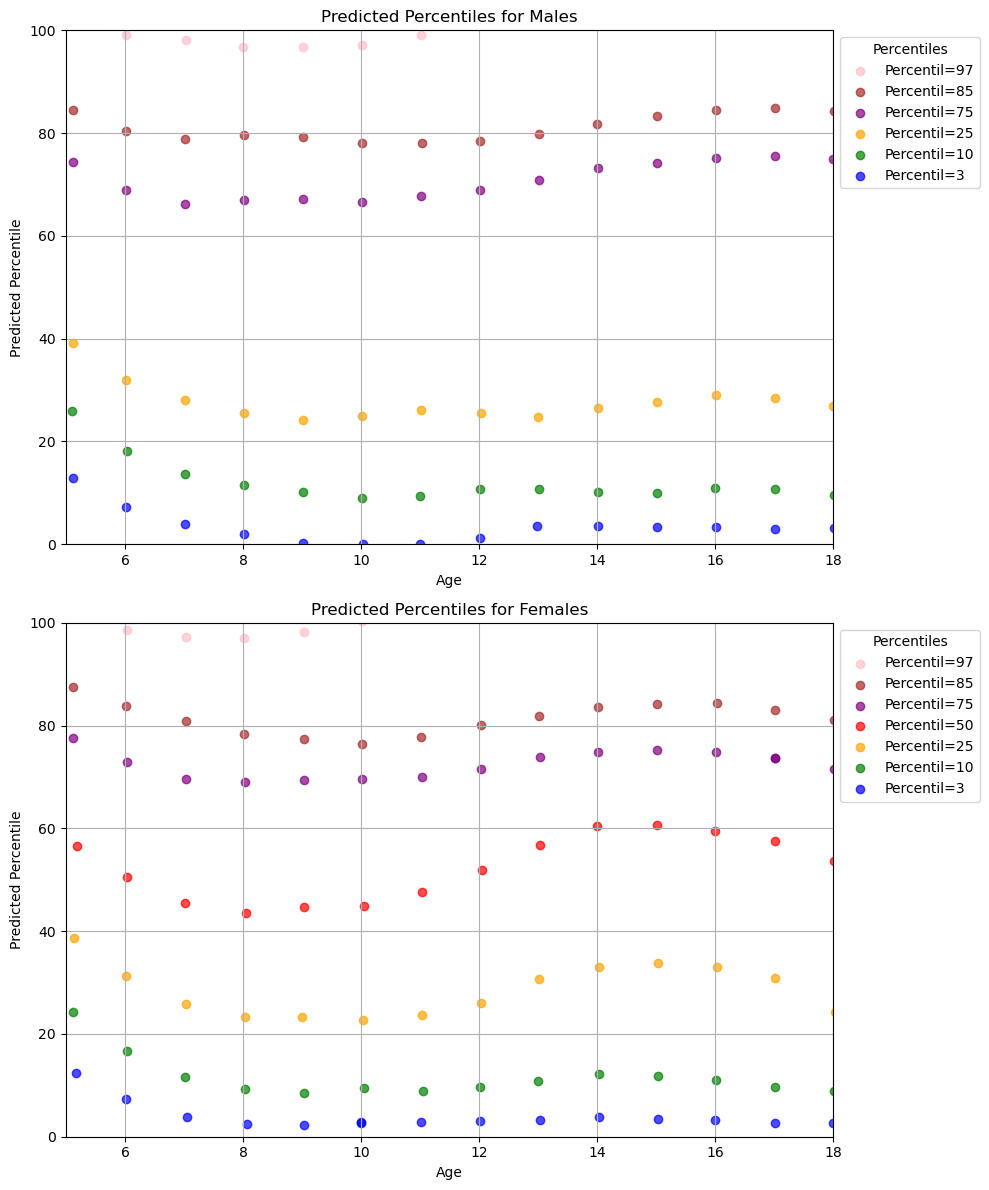

    Sex        Age        BMI  Percentile  Inferred Percentile  Percentile Difference (%)
0     M   5.118310  16.465448          97           101.566330                   4.707557
1     M   6.012207  16.656076          97            99.038376                   2.101418
2     M   7.030986  17.053217          97            98.169319                   1.205484
3     M   8.003756  17.529786          97            96.818550                  -0.187062
4     M   9.015963  18.149324          97            96.668831                  -0.341411
5     M  10.021596  18.832406          97            97.206276                   0.212656
6     M  11.014085  19.626687          97            98.996933                   2.058694
7     M  12.019719  20.468625          97           101.258682                   4.390394
8     M  13.012206  21.374106          97           104.236565                   7.460376
9     M  14.017840  22.279587          97           107.340591                  10.660404
10    M  1

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

def plot_bmi_percentile_predictions(model, csv_file):
    # Load the dataset
    dataset = pd.read_csv(csv_file, header=0)
    
    # Define percentile colors for plotting
    percentile_colors = {
        3: 'blue',
        10: 'green',
        25: 'orange',
        50: 'red',
        75: 'purple',
        85: 'brown',
        97: 'pink'
    }

    # Prepare lists to store data for the table
    table_data = {
        'Sex': [],
        'Age': [],
        'BMI': [],
        'Percentile': [],
        'Inferred Percentile': [],
        'Percentile Difference (%)': []  # New column for percentage difference
    }

    # Prepare the figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Loop through each row in the dataset
    for _, row in dataset.iterrows():
        gender = row['sex']  # Gender column
        actual_percentile = row['percentile']  # Actual Percentile column
        age = row['age']  # Age column
        bmi = row['BMI']  # BMI column

        # Prepare input features for the model
        features = pd.DataFrame({
            'age': [age],
            'BMI': [bmi],
            'F': [1 if gender == 'F' else 0],
            'M': [1 if gender == 'M' else 0]
        })

        features_np = np.array([[age, bmi, 1 if gender == 'F' else 0, 1 if gender == 'M' else 0]])

        # Predict the percentile using the model
        predicted_percentile = model.predict(features_np, verbose=0)[0][0]

        # Calculate the difference as a percentage of the actual percentile
        percent_diff = ((predicted_percentile - actual_percentile) / actual_percentile) * 100

        # Select the correct axis for plotting
        ax = ax1 if gender == 'M' else ax2

        # Plot the predicted percentile against age with the corresponding color (based on actual percentile)
        color = percentile_colors.get(actual_percentile, 'gray')
        ax.scatter(age, predicted_percentile, color=color, alpha=0.7, label=f"Percentil={actual_percentile}" if not ax.get_legend_handles_labels()[1].count(f'Percentil={actual_percentile}') else "")

        # Add data to the table lists
        table_data['Sex'].append(gender)
        table_data['Age'].append(age)
        table_data['BMI'].append(bmi)
        table_data['Percentile'].append(actual_percentile)
        table_data['Inferred Percentile'].append(predicted_percentile)
        table_data['Percentile Difference (%)'].append(percent_diff)

    # Create a DataFrame for the table and print it
    result_table = pd.DataFrame(table_data)

    # Set titles and labels for each plot
    ax1.set_title('Predicted Percentiles for Males')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Predicted Percentile')
    ax1.set_xlim(5, 18)
    ax1.set_ylim(0, 100)
    ax1.grid()
    
    ax2.set_title('Predicted Percentiles for Females')
    ax2.set_xlabel('Age')
    ax2.set_ylabel('Predicted Percentile')
    ax2.set_xlim(5, 18)
    ax2.set_ylim(0, 100)
    ax2.grid()

    # Place legends outside the plots
    ax1.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Percentiles')
    ax2.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Percentiles')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

    # To display all rows in the DataFrame
    pd.set_option('display.max_rows', None)
    # Set display options for Jupyter to ensure rows fit in one line
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)        # Set maximum display width
    pd.set_option('display.max_colwidth', 50)   # Adjust column width if necessary

    # To print the entire table again
    print(result_table)

    # Revert back to default row limit if needed
    pd.reset_option('display.max_rows')
    # Reset options after display if needed
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.max_colwidth')

# Call the function with your model and CSV file
plot_bmi_percentile_predictions(linear_model, "IMC_Varones_y_mujeres.csv")

In [55]:
# Infer percentile based on user input (prompted by the function)
def infer_percentile(model):
    # Prompt user for input
    gender = input("Please enter your gender (M for male, F for female): ").strip().upper()
    
    while gender not in ['M', 'F']:
        print("Invalid input. Please enter 'M' for male or 'F' for female.")
        gender = input("Please enter your gender (M for male, F for female): ").strip().upper()

    age = float(input("Please enter your age (5 to 18): "))
    
    while age < 5 or age > 18:
        print("Invalid input. Age must be between 5 and 18.")
        age = float(input("Please enter your age (5 to 18): "))

    imc = float(input("Please enter your BMI (IMC): "))
    
    # Prepare input features
    features = pd.DataFrame({
        'age': [age],
        'BMI': [imc],
        'F': [1 if gender == 'F' else 0],
        'M': [1 if gender == 'M' else 0]
    })

     # Create input as a NumPy array
    features_np = np.array([[age, imc, 1 if gender == 'F' else 0, 1 if gender == 'M' else 0]])

    # Predict the percentile using the model
    predicted_percentile = model.predict(features_np)[0][0]
    
    print(f"{features}")

    print(f"The inferred percentile for a {age}-year-old {'male' if gender == 'M' else 'female'} with a BMI of {imc} is approximately {predicted_percentile:.2f}.")

# Call the function to test it
infer_percentile(linear_model)

1/1 [==============================] - 0s 13ms/step
    age   BMI  M  F
0  11.0  18.0  1  0
The inferred percentile for a 11.0-year-old male with a BMI of 18.0 is approximately 60.59.


In [56]:
# Save the model
SAVED_MODEL_PATH = '/tmp/clau'
#SAVED_MODEL_PATH = 'D:\tmp\claudio'

tf.saved_model.save(
    linear_model, SAVED_MODEL_PATH,
)


INFO:tensorflow:Assets written to: /tmp/clau/assets


INFO:tensorflow:Assets written to: /tmp/clau/assets


In [57]:
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_PATH) # path to the SavedModel directory

tflite_model = converter.convert()

# https://www.tensorflow.org/lite/models/convert/convert_models
# Convert the model.
#converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

# Print the signatures from the converted model
interpreter = tf.lite.Interpreter(model_content=tflite_model)

signatures = interpreter.get_signature_list()
print(signatures)

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

2024-09-27 22:00:19.605159: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-09-27 22:00:19.605173: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


{'serving_default': {'inputs': ['normalization_1_input'], 'outputs': ['dense_7']}}


2024-09-27 22:00:19.605435: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/clau
2024-09-27 22:00:19.606249: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2024-09-27 22:00:19.606254: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/clau
2024-09-27 22:00:19.608125: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-09-27 22:00:19.609004: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-09-27 22:00:19.641310: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/clau
2024-09-27 22:00:19.649537: I tensorflow/cc/saved_model/loader.cc:314] SavedModel load for tags { serve }; Status: success: OK. Took 44103 microseconds.
2024-09-27 22:00:19.666293: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set e

Columns in the CSV file: ['sex', 'percentile', 'age', 'BMI']


KeyError: 'Sexo'

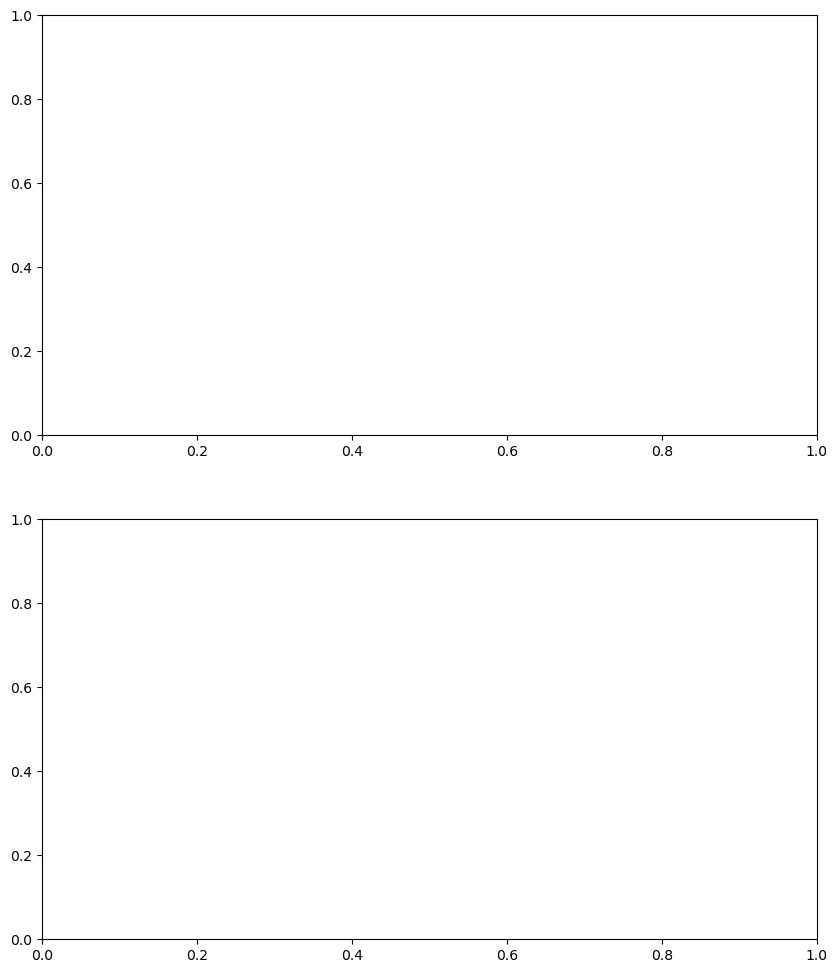

In [58]:
import matplotlib.lines as mlines

def plot_bmi_predictions(model, csv_file):
    # Load the dataset
    dataset = pd.read_csv(csv_file, header=0)

    # Print the column names to check the structure
    print("Columns in the CSV file:", dataset.columns.tolist())

    # Define the percentile colors
    percentile_colors = {
        3: 'blue',
        10: 'green',
        25: 'orange',
        50: 'red',
        75: 'purple',
        85: 'brown',
        97: 'pink'
    }

    # Prepare the figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    # Sets to track added legend labels
    added_labels_males = set()
    added_labels_females = set()

    # Loop through each row in the dataset
    for index, row in dataset.iterrows():
        gender = row['Sexo']  # Gender column
        percentile = row['Percentil']  # Percentile column
        age = row['Edad']  # Age column
        bmi = row['IMC']  # BMI column

        # Prepare input features
        features = pd.DataFrame({
            'Edad': [age],
            'IMC': [bmi],
            'Sexo_M': [1 if gender == 'M' else 0],
            'Sexo_F': [1 if gender == 'F' else 0]
        })

        # Normalize the features
        normalized_features = normalizer(features)

        # Predict the percentile using the model
        predicted_percentile = model.predict(normalized_features)[0][0]

        # Select the correct axis for plotting
        ax = ax1 if gender == 'M' else ax2
        
        # Plot the predicted BMI against age with the corresponding color
        color = percentile_colors.get(percentile, 'gray')
        ax.scatter(age, bmi, color=color, alpha=0.7)

        # Add the legend label only once for each percentile
        if gender == 'M' and percentile not in added_labels_males:
            ax.scatter([], [], color=color, label=f'Percentil={percentile}')  # Create an empty scatter for legend
            added_labels_males.add(percentile)
        elif gender == 'F' and percentile not in added_labels_females:
            ax.scatter([], [], color=color, label=f'Percentil={percentile}')  # Create an empty scatter for legend
            added_labels_females.add(percentile)

    # Set titles and labels for each plot
    ax1.set_title('BMI Predictions for Males')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('BMI')
    ax1.set_xlim(5, 18)
    ax1.set_ylim(10, 30)
    ax1.grid()
    
    ax2.set_title('BMI Predictions for Females')
    ax2.set_xlabel('Age')
    ax2.set_ylabel('BMI')
    ax2.set_xlim(5, 18)
    ax2.set_ylim(10, 30)
    ax2.grid()

    # Create legend handles for males and females
    legend_handles_males = [mlines.Line2D([], [], color=color, label=f'Percentil={percentile}') 
                            for percentile, color in percentile_colors.items() if percentile in added_labels_males]

    legend_handles_females = [mlines.Line2D([], [], color=color, label=f'Percentil={percentile}') 
                              for percentile, color in percentile_colors.items() if percentile in added_labels_females]

    # Place legends outside the plots
    ax1.legend(handles=legend_handles_males, loc='upper left', bbox_to_anchor=(1, 1), title='Percentiles')
    #ax2.legend(handles=legend_handles_females, loc='upper left', bbox_to_anchor=(1, 1), title='Percentiles')

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

# Call the function with your model and CSV file
plot_bmi_predictions(linear_model, "IMC_Varones_y_mujeres.csv")